In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from textblob import TextBlob,Word
from nltk.corpus import stopwords
sw=stopwords.words("english")
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
import string
import time
import joblib
from joblib import Memory
import os

## Basic Data and EDA

In [2]:

data=pd.read_csv(r"C:\Users\p7522\Downloads\reviews_data_dump\reviews_badminton\data.csv")

data.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [4]:
data.loc[0,"Review text"]

'Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE'

In [5]:
df = data[["Review text","Ratings"]]

In [6]:
df.head()

,Review text,Ratings
0,"Nice product, good quality, but price is now r...",4
1,They didn't supplied Yonex Mavis 350. Outside ...,1
2,Worst product. Damaged shuttlecocks packed in ...,1
3,"Quite O. K. , but nowadays the quality of the...",3
4,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [7]:
df.Ratings.value_counts()

5    5080
4    1746
1     769
3     615
2     308
Name: Ratings, dtype: int64

In [8]:
df["Ratings"] = ['Negative Review' if 1 <=i <=3 else "positive Review" for i in df["Ratings"]]

In [9]:
df["Ratings"].value_counts()

positive Review    6826
Negative Review    1692
Name: Ratings, dtype: int64

In [10]:
df.dropna(axis=0,inplace=True)

df["Review text"].isnull().sum()

0

In [11]:
df.shape

(8510, 2)

# step 1 - Identify input and output


In [12]:
X = df['Review text']

y = df['Ratings']

# step 2 - Splitting the Data into Train and test


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42,test_size=0.2)


print("X_train:",X_train.shape)

print("X_test:",X_test.shape)

print("y_train:",y_train.shape)

print("y_test:",y_test.shape)

X_train: (6808,)
X_test: (1702,)
y_train: (6808,)
y_test: (1702,)


# Data Visulization


In [15]:
def wordcloud(data):
    
    wc = WordCloud(background_color = "black", width = 1800, height = 2000).generate("".join(data))
    
    plt.imshow(wc)
    
    plt.axis("off")
    
    plt.show()

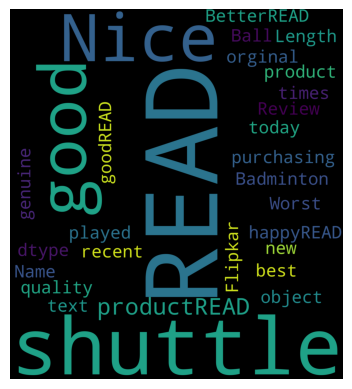

In [16]:
wordcloud(str(X_train))

# step 3 : Data Preprocessing on train data


In [17]:
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def clean(text):
    
    # Checking punctuation and removing numbers
    text = "".join([char for char in text if char not in string.punctuation and not char.isdigit()])
    
    # Converting to lowercase
    text = text.lower()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Removing stopwords
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in sw]
    
    # Joining and returning
    return " ".join(filtered_tokens)


In [18]:
#data preprocessing the x_train

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(preprocessor=clean)

%time

X_train_vec = vectorizer.fit_transform(X_train)

print(X_train_vec.shape)

CPU times: total: 0 ns
Wall time: 0 ns
(6808, 3096)


In [19]:
#data preprocessing the x_test

%time

X_test_vec = vectorizer.transform(X_test)

print(X_test_vec.shape)

CPU times: total: 0 ns
Wall time: 0 ns
(1702, 3096)


In [20]:
print(X_train.shape,y_train.shape)

(6808,) (6808,)



# Step 4 Pipeline For Vectorization and Model Building

In [21]:
#building a model
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

%time 

logreg.fit(X_train_vec, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


LogisticRegression()

In [22]:
#evaluating the model

from sklearn import metrics

y_train_pred = logreg.predict(X_train_vec)

metrics.accuracy_score(y_train,y_train_pred)

0.913337250293772

In [23]:
cm = metrics.confusion_matrix(y_train, y_train_pred)

cm

array([[ 823,  527],
       [  63, 5395]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

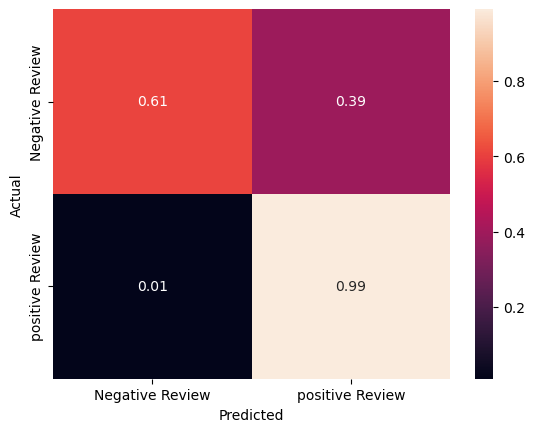

In [24]:
cm = metrics.confusion_matrix(y_train,y_train_pred)

actual = np.sum(cm, axis = 1).reshape(-1,1)

cmn = np.round(cm/actual,2)

sns.heatmap(cmn, annot = True, fmt = ".2f", xticklabels = logreg.classes_,yticklabels = logreg.classes_)

plt.ylabel("Actual")

plt.xlabel("Predicted")

In [25]:
# evaluating test score
y_test_pred = logreg.predict(X_test_vec)
metrics.accuracy_score(y_test,y_test_pred)

0.8760282021151586

In [26]:
cm = metrics.confusion_matrix(y_test,y_test_pred)

cm

array([[ 160,  177],
       [  34, 1331]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

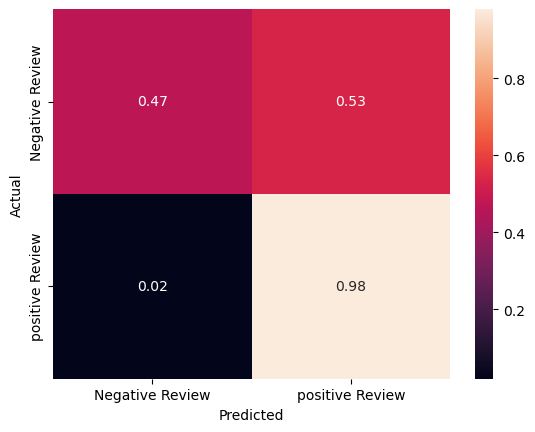

In [27]:
cm = metrics.confusion_matrix(y_test,y_test_pred)

actual = np.sum(cm, axis = 1).reshape(-1,1)

cmn = np.round(cm/actual,2)

sns.heatmap(cmn, annot = True, fmt = ".2f",xticklabels = logreg.classes_,yticklabels = logreg.classes_)

plt.ylabel("Actual")

plt.xlabel("Predicted")

In [28]:
print("Train Score (F1 Score):",metrics.f1_score(y_train,y_train_pred,pos_label = -1, average = 'micro'))

print("Train Score (F1 Score):",metrics.f1_score(y_test,y_test_pred,pos_label = -1, average = 'micro'))


Train Score (F1 Score): 0.9133372502937719
Train Score (F1 Score): 0.8760282021151586


# Creating an Optimal Workflow

In [29]:
%time

X_train_clean = X_train.apply(lambda doc: clean(doc))

%time

X_test_clean = X_test.apply (lambda doc: clean(doc))

CPU times: total: 0 ns
Wall time: 0 ns
CPU times: total: 0 ns
Wall time: 0 ns


In [30]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [31]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
             'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    
    %time
    
    grid_search.fit(X_train_clean, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))

********** naive_bayes **********
CPU times: total: 0 ns
Wall time: 0 ns
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Score on Test Data:  0.8742655699177438
********** decision_tree **********
CPU times: total: 0 ns
Wall time: 0 ns
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Score on Test Data:  0.8601645123384254
********** logistic_regression **********
CPU times: total: 0 ns
Wall time: 0 ns
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Score on Test Data:  0.8689776733254995


In [33]:
for name, model in best_models.items():
    
    print(f"{name}")
    
    print(f"{model}")
    
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.6,
                                    penalty='elasticnet', solver='saga'))])



In [39]:
for name, model in best_models.items():
    print("*" * 10, name, "*" * 10)
    
    joblib.dump(model, f'{name}.pkl')
    model = joblib.load(f'{name}.pkl')
    
    start_time = time.time()
    
    y_train_pred=model.predict(X_train_clean)
    y_test_pred = model.predict(X_test_clean)
    
    end_time = time.time()
    
    execution_time = end_time - start_time
    
    print("Execution Time:", execution_time, "seconds")

    print("Train Score (F1):", metrics.f1_score(y_train, y_train_pred, pos_label=-1, average='micro'))
    print("Test Score (F1):", metrics.f1_score(y_test, y_test_pred, pos_label=-1, average='micro'))
    
    model_size = os.path.getsize(f'{name}.pkl')
    print("Model Size:", model_size, "Bytes")

********** naive_bayes **********
Execution Time: 0.0629115104675293 seconds
Train Score (F1): 0.9036427732079906
Test Score (F1): 0.8742655699177438
Model Size: 180952 Bytes
********** decision_tree **********
Execution Time: 0.07065868377685547 seconds
Train Score (F1): 0.8719153936545241
Test Score (F1): 0.8601645123384254
Model Size: 87754 Bytes
********** logistic_regression **********
Execution Time: 0.06314444541931152 seconds
Train Score (F1): 0.9221504112808461
Test Score (F1): 0.8689776733254995
Model Size: 106835 Bytes
